In [119]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Context of the dataset ##

As an example, we will study a population of flight delay times. The table united contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the Bureau of Transportation Statistics in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative: those flights left early.As an example, we will study a population of flight delay times. The table united contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the Bureau of Transportation Statistics in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative: those flights left early.

In [120]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

In [121]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


### Guiding Question ####

Given any population, how can we maximize the use of samples to generate statistics that can more accurately estimate an unknown population parameter?

- Use Bootstrap samples

## Population Distribution and Parameter ##

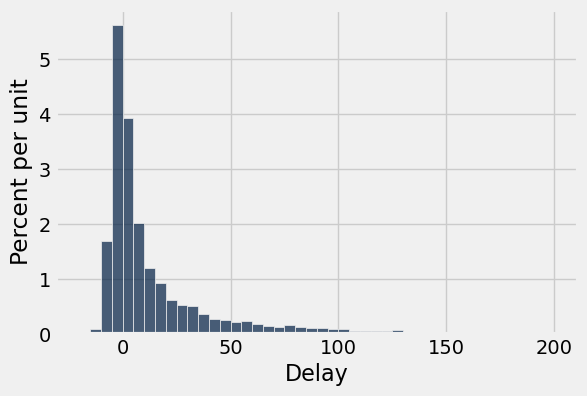

In [122]:
# (Population) Probability Distribution

united.hist('Delay', bins = united_bins)

In [123]:
# (Population) Parameter
pop_median = np.median(united.column('Delay'))
pop_median

2.0

## Sample Statistic

In [124]:
# Define a user-defined function that pulls a random sample(numnber of rows) of a given size
# Then computes the median Delay time.

def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [125]:
sample_median(100)

3.5

- A statistic (note the singular!) is any number computed using the data values in a sample. The sample median, therefore, is a statistic.

- How good of an estimate do you think the value of your statistic(observed above) is of the true value of POPULATION MEDIAN DELAY(equal to 2 above)? Would you like to draw another sample to see if you can get a better statistic(estimate)?

- How different could this estimate have been, if the sample had come out differently? Just how different could the statistic have been? One way to answer this is to simulate the statistic many times and note the values. A histogram of those values will tell us about the distribution of the statistic.



## Lesson Goals ##

Our goal in this lesson is to consider an example of how a statistic can provide a good estimate of a parameter.

## Empirical Distributions of a Statistic ##

In [126]:
num_simulations = 5000

sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(100)
    sample_medians = np.append(sample_medians, new_median)

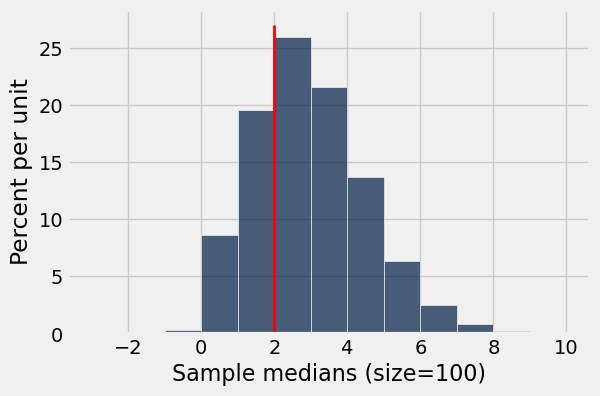

In [127]:
sampling_bins = np.arange(-3, 11, 1)

Table().with_column('Sample medians (size=100)', sample_medians).hist(bins = sampling_bins)
plots.plot([pop_median, pop_median], [0,.27], color='red', lw=2);

The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn. Does it?

## Bootstrapping ##

Empirical distributions require repeatedly drawing samples from a population. 

What if a data scientist does NOT have the resources to go back to the population and draw another sample? Draw bootstrap samples.

Here are the steps of the bootstrap method for generating another random sample that resembles the population:

- Treat the original sample as if it were the population.

- Draw from the sample, at random with replacement(`sample(with_replacement = True) is the default`), the same number of times as the original sample size.



To estimate the population median using bootstrap resamples, we proceed by the following processes/steps:

- Draw a large random sample from the population.

- Bootstrap your random sample and get an estimate from the new random sample.

- Repeat the above bootstrap step thousands of times, and get thousands of estimates.

- Pick off the “middle 95%” interval of all the estimates.

In [128]:
# Step #1: Draw a large random sample from the population and observe its characteristics.

our_sample = united.sample(100, with_replacement=False) # This is the only sample we have w/o replacement.
our_sample

# Step #2: Bootstrap your random sample and get an estimate from the new random sample.
# Take a bootstrap (re)sample of size 100, WITH replacement and observe the characteristics.

boot_sample = our_sample.sample(100, with_replacement=True)
boot_sample.hist('Delay', bins=united_bins)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", np.median(boot_sample.column('Delay')))

# Step #3: Repeat the above bootstrap step thousands of times, and get thousands of estimates.
# To do this, let's define a function that returns the median of Delay times in a bootstrap resample.

def one_bootstrap_median():
    single_sample = our_sample.sample()
    return np.median(single_sample.column('Delay'))

# Make a call to the function above thousands of times, and get thousands of estimates.
bootstrap_medians = make_array()

for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

# Plot a histogram of the Bootstrap Empirical Distribution of the Sample Median

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist(
    'Bootstrap Medians', bins = sampling_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");

Row,Date,Flight Number,Destination,Delay
9305,8/1/15,1796,IAD,30
13451,8/29/15,760,JFK,-3
8217,7/25/15,1684,LIH,-3
7927,7/23/15,1728,ORD,-1
835,6/6/15,1437,AUS,-6
4776,7/2/15,1683,EWR,244
12955,8/25/15,1927,IAH,12
10807,8/11/15,1183,LAS,10
2343,6/16/15,1401,SAN,21
8426,7/27/15,572,ORD,385


In [129]:
our_sample_median = np.median(our_sample.column('Delay'))
our_sample_median

1.0

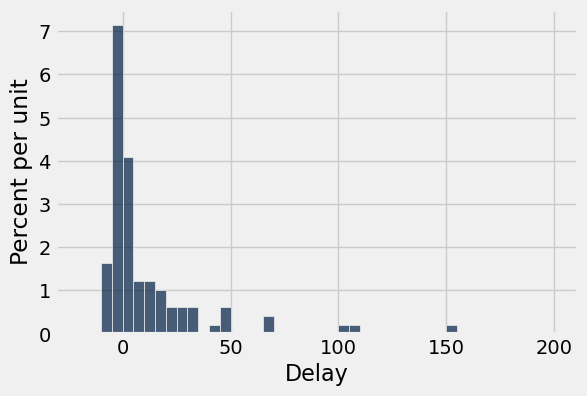

In [130]:
our_sample.hist('Delay', bins=united_bins)

Population Median =        2.0
Our Sample Median =        1.0
Bootstrap Sample Median =  1.5


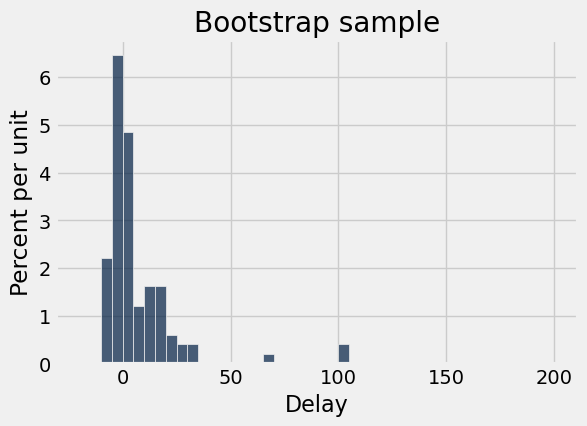

In [131]:
# Step #2: Bootstrap your random sample and get an estimate from the new random sample.
# Take a bootstrap (re)sample of size 100, WITH replacement and observe the characteristics.

boot_sample = our_sample.sample(100, with_replacement=True)
boot_sample.hist('Delay', bins=united_bins)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", np.median(boot_sample.column('Delay')))

## Bootstrap Empirical Distribution of the Sample Median ##

In [132]:
# Step #3: Repeat the above bootstrap step thousands of times, and get thousands of estimates.
# To do this, let's define a function that returns the median of Delay times in a bootstrap resample.

def one_bootstrap_median():
    single_sample = our_sample.sample()
    return np.median(single_sample.column('Delay'))

In [133]:
# Make a call to the function above thousands of times, and get thousands of estimates.

bootstrap_medians = make_array()

for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

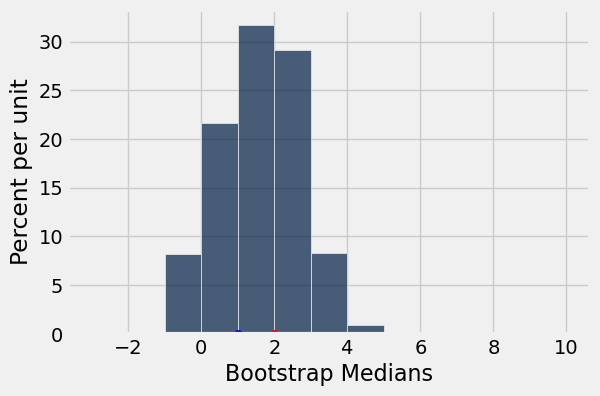

In [134]:
# Plot a histogram of the Bootstrap Empirical Distribution of the Sample Median

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist(
    'Bootstrap Medians', bins = sampling_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");

## A slight detour to pick up a tool we need: Percentiles ##

Let $p$ be a number between 0 and 100. 

The $p$th percentile of a collection of data values is the smallest value in the collection that is at least as large as p% of all the values.

We consider an example of how to manually compute the 55th percentile of a collection of data values.

In [135]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [136]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [137]:
# Step 2. Figure out where 55th percentile would be.

np.ceil(55/100 * 6)

4.0

In [138]:
np.sort(x).item(4 - 1)

34

An alternative and faster approach is to use the `percentile` fucntion in the datascience module.

The percentile function takes two arguments: 

- a rank between 0 and 100, and
- an array. 

It returns the corresponding percentile of the array.

In [139]:
# OR: 1 Line of Code
percentile(55, x)

34

## Use the percentile function to construct Confidence Intervals

In [140]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

left, right

(-1.0, 3.0)

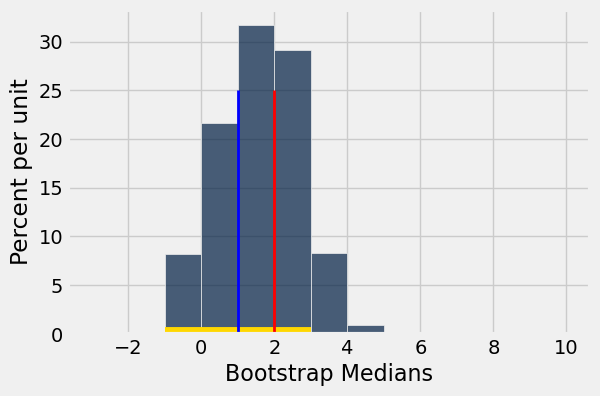

In [141]:
# Visualize the Bootstrap empirical distribution of the sample medians
# Impose the left and right end points of the 95% confidence interval for the population median
# Also superimpose the values of the population and original sample medians.

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins = sampling_bins)

plots.plot([left, right], [0,0], color="gold",lw=10, zorder=1);
plots.plot([pop_median, pop_median], [0,0.25], color="red",lw=2, zorder=1); # the population median 
plots.plot([our_sample_median, our_sample_median], [0,0.25], color="blue",lw=2, zorder=1); # the parent sample median